In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale , StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [2]:
df=pd.read_csv(r"C:\Users\Onur\Desktop\Turkcell_MachineLearning\diabetes.csv")
y=df["Outcome"]
X=df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=42)

# model tahmin

In [3]:
!pip install xgboost

In [4]:
from xgboost import XGBClassifier

In [10]:
xgb_model=XGBClassifier().fit(X_train,y_train)

In [6]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> _weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\onur\anaconda3\envs\test_conda_env\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtree, gblinear or dart.
    tree_method: string
        Specify which tree method to use.  Defau

In [11]:
y_pred=xgb_model.predict(X_test)

In [12]:
accuracy_score(y_test,y_pred)

0.7359307359307359

# MODEL TUNİNG

In [13]:
xgb=XGBClassifier()

In [14]:
xgb_params={'n_estimators':[100,500,1000],
           'subsample':[0.6,0.8,1],  #göz önünde bulundurulacak örneklem oranı
           'max_depth':[3,5,7],
           'learning_rate':[0.1,0.01,0.001]} 

In [15]:
xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  2.3min finished


In [16]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [17]:
# final modeli

In [18]:
xgb_tuned=XGBClassifier(learning_rate=0.001,max_depth=7,n_estimators=500,subsample=0.6).fit(X_train,y_train)

In [19]:
y_pred=xgb_tuned.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.7575757575757576

# değişken önem düzeyi

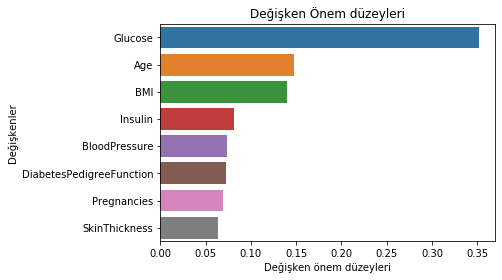

In [21]:
features_imp=pd.Series(xgb_tuned.feature_importances_,
                      index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=features_imp,y=features_imp.index)
plt.xlabel('Değişken önem düzeyleri')
plt.ylabel('Değişkenler')
plt.title('Değişken Önem düzeyleri')
plt.show()